In [69]:
import numpy as np

data1 = np.array([
# [월, 제품종류수, 유통채널수, 평균출고가(원), 프로모션횟수, 재고량(병), 판매량(병), 매출(원)]
    [1,  3,  5, 1800, 1,  80000,  52000,   93600000],
    [2,  3,  5, 1800, 1,  85000,  55000,   99000000],
    [3,  4,  8, 1900, 2, 120000,  82000,  155800000],
    [4,  4,  8, 1900, 2, 140000,  90000,  171000000],
    [5,  5, 12, 2000, 3, 180000, 120000,  240000000],
    [6,  5, 12, 2100, 4, 260000, 170000,  357000000],
    [7,  6, 16, 2200, 5, 340000, 240000,  528000000],
    [8,  6, 16, 2300, 6, 800000, 600000, 1380000000]  # 이상치
])

# 데이터 특징
columns1 = [
    "월(0)",
    "제품종류수(1)",
    "유통채널수(2)",
    "출고가(3)",
    "프로모션(4)",
    "재고량(5)",
    "판매량(6)",
    "매출(7)"
]
#data[행,열]
#[:,5] = : = 모든행, 6번째 열(0부터 시작)
month = data1[:,0]
item = data1[:,1]
chanel = data1[:,2]
price = data1[:,3]
promotion = data1[:,4]
leftItem = data1[:,5]
sale = data1[:,6]
earn = data1[:,7]

minValue = np.min(data1, axis=0)
maxValue = np.max(data1, axis=0)
print("★ 변수 스케일 비교 (정규화 전) ★")
for i in range(len(columns1)):
    print(f"{columns1[i]} : {minValue[i]:,} ~ {maxValue[i]:,}")

# -> 매출로 보아 정규화가 필요하겠다
# -> (이상치 분석 후) standardScaling이 효율적이겠다
meanValue = np.mean(data1, axis=0)
stdValue = np.std(data1, axis=0)
standardScaled = (data1 - meanValue) / stdValue

# Feature Engineering
    #해석 가능한 새로운 의미를 가진 변수를 만듦
    #파생변수 만들고 -> 정규화 진행하는 것
    # 회귀, 클러스터링 등을 할 때 feature과 함께 정규화 (여기선 안하겠음)

# 1. 유통채널수에 따른 판매량 변화
    #채널이 늘었는데 값이 감소? -> 채널이 과다하다
chanelEffect = sale / chanel
print("유통채널 갯수에 따른 판매율 : ", chanelEffect)

# 2. 프로모션에 따른 매출 변화
    # 프로모션 상승과 매출의 상승이 정방향? -> 효과적
promotionEffect = earn / promotion
print("프로모션 횟수에 따른 매출율 : ", promotionEffect)

# 3. 재고 회전율
    # = 판매량 / 재고량
    # 회전율이 높다 -> 공급과 수요가 좋다
    # 회전율이 낮다 -> 과잉 생산이거나 유통의 문제가 있을 수 있다
turnover = sale / leftItem
print("재고 회전율 : ", turnover)


★ 변수 스케일 비교 (정규화 전) ★
월(0) : 1 ~ 8
제품종류수(1) : 3 ~ 6
유통채널수(2) : 5 ~ 16
출고가(3) : 1,800 ~ 2,300
프로모션(4) : 1 ~ 6
재고량(5) : 80,000 ~ 800,000
판매량(6) : 52,000 ~ 600,000
매출(7) : 93,600,000 ~ 1,380,000,000
유통채널 갯수에 따른 판매율 :  [10400.         11000.         10250.         11250.
 10000.         14166.66666667 15000.         37500.        ]
프로모션 횟수에 따른 매출율 :  [9.360e+07 9.900e+07 7.790e+07 8.550e+07 8.000e+07 8.925e+07 1.056e+08
 2.300e+08]
재고 회전율 :  [0.65       0.64705882 0.68333333 0.64285714 0.66666667 0.65384615
 0.70588235 0.75      ]


In [70]:
import pandas as pd
# 도메인 별로 feature Engineering해보기

data_fin = {
    'user_id': [101, 102, 103, 104, 105],
    'age': [25, 45, 32, 58, 22],                     
    'annual_income': [4000, 9000, 5500, 8500, 3200], #연봉
    'debt_payment': [1200, 3000, 1100, 4500, 800],   #연간 원리금 상환액
}
df_fin = pd.DataFrame(data_fin)

data_sci = {
    'temp_c' : [98.5, 99.2, 100.1, 99.8, 100.5]  #온도
}
df_sci = pd.DataFrame(data_sci)

data_ecom = {
    'price': [10000, 50000, 20000, 15000, 30000],    #가격
    'discount_rate': [0.1, 0.2, 0.05, 0.3, 0.15],    #할인율
    'last_visit_days': [2, 45, 5, 120, 1],           #마지막 방문 후 경과일
    'total_orders': [15, 2, 8, 1, 20],               #총 주문 횟수
}
df_ecom = pd.DataFrame(data_ecom)

In [71]:
# 금융 : 소득 대비 부채 상환 비중이 높으면 위험하다 (DSR지표)
df_fin['dsr'] = df_fin['debt_payment'] / df_fin['annual_income']
print(df_fin)

danger = [0,0.2,0.4, np.inf]
labels_fin = ['Safe', 'Normal', 'High Risk']
df_fin['dsr_grade'] = pd.cut(df_fin['dsr'], bins=danger, labels = labels_fin)
print(df_fin[['user_id','dsr_grade']])

   user_id  age  annual_income  debt_payment       dsr
0      101   25           4000          1200  0.300000
1      102   45           9000          3000  0.333333
2      103   32           5500          1100  0.200000
3      104   58           8500          4500  0.529412
4      105   22           3200           800  0.250000
   user_id  dsr_grade
0      101     Normal
1      102     Normal
2      103       Safe
3      104  High Risk
4      105     Normal


In [72]:
# 과학 : 패턴강조(미미한 차이를 증폭), 물은 100도를 넘는 순간 끓는다
df_sci['boil'] = np.where(df_sci['temp_c'] >= 100, 1, 0)
print(df_sci)

   temp_c  boil
0    98.5     0
1    99.2     0
2   100.1     1
3    99.8     0
4   100.5     1


In [73]:
# 이커머스 : 상호작용 feature : 두변수가 상호작용했을 때 결과 증폭, 실제 할인 금액
df_ecom['discount_amount'] = df_ecom['price'] * df_ecom['discount_rate']
print(df_ecom.sort_values('discount_amount', ascending=False)[['price', 'discount_rate', 'discount_amount', 'last_visit_days', 'total_orders']])

   price  discount_rate  discount_amount  last_visit_days  total_orders
1  50000           0.20          10000.0               45             2
4  30000           0.15           4500.0                1            20
3  15000           0.30           4500.0              120             1
0  10000           0.10           1000.0                2            15
2  20000           0.05           1000.0                5             8


In [74]:
# 재정 : 범주별 feature : 연령대별 상대적 소득 수준
df_fin['age_group'] = (df_fin['age'] // 10) * 10
group_mean = df_fin.groupby('age_group')['annual_income'].transform('mean')
df_fin['group_income_ratio'] = df_fin['annual_income'] / group_mean

col = [
    'user_id',
    'age',
    'annual_income',
    'group_income_ratio'
]
print(df_fin[col])

   user_id  age  annual_income  group_income_ratio
0      101   25           4000            1.111111
1      102   45           9000            1.000000
2      103   32           5500            1.000000
3      104   58           8500            1.000000
4      105   22           3200            0.888889


C:\Users\bhc02\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhc02\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhc02\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhc02\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhc02\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4420

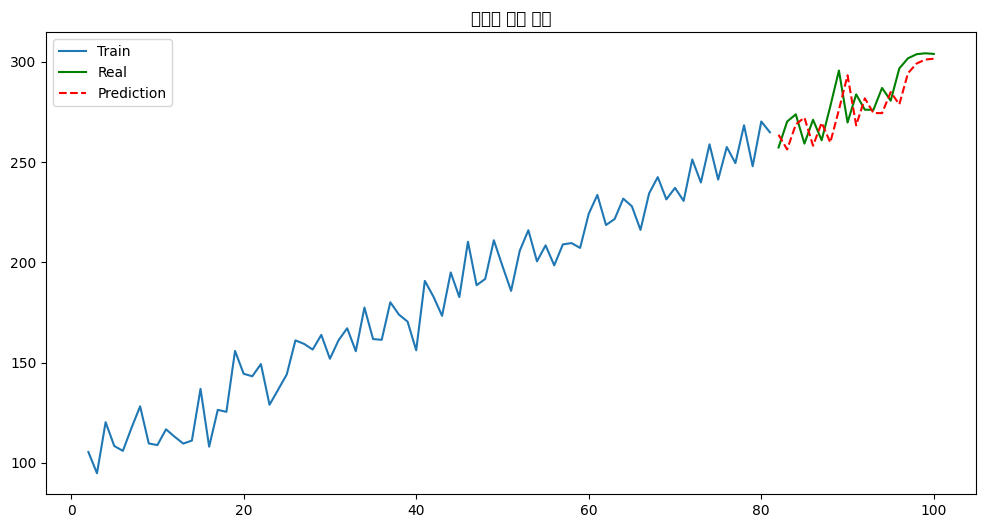

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 시계열 : 변화량을 모델에 제공함으로써 '흐름'을 파악하도록 함
    #Linear Regression 사용

#100일간 매출, 매일 2개식 매출 증가 + 랜덤 노이즈
np.random.seed(67)
days = np.arange(1,101)
sales = 100 + (days*2) + (np.random.normal(0,30,100)) #평균, 표준편차, 개수
df = pd.DataFrame({'day' : days, 'sales' : sales})

#shift(이전or다음 값 사용)을 통해 어제의 매출 불러옴 -> 오늘 예측을 위해 학습
df['pre_day_sales'] = df['sales'].shift(1)
df = df.dropna() #첫날 오류 제거

train = df.iloc[:80] #80일까진 학습
test = df.iloc[80:] #남은 20일로 시험

X_train = train[['pre_day_sales']]
Y_train = train['sales']

X_test = test[['pre_day_sales']]
Y_test = test['sales']

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.predict(X_test)
#결과_시각화
plt.figure(figsize=(12, 6))
plt.plot(train['day'], train['sales'], label='Train')
plt.plot(test['day'], test['sales'], label='Real', color='green')
plt.plot(test['day'], result, label='Prediction', color='red', linestyle='--')
plt.title("시계열 가격 예측")
plt.legend()
plt.show()